In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=5179)

In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [3]:
input = gpd.read_file('./Ex/220203/남한육역 면적/남한육역 면적.shp', encoding='utf8')
# plot_map(input)

In [13]:
flist = glob.glob('./Ex/220203/법정정보/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
flist

교통안전특정해역
도선사승하선구역
신항만예정지역
정박지구역
통항분리구역
통항제한금지구역
항로표지설치해역
항만구역
항만배후단지


['./Ex/220203/법정정보\\8.항만항행(18)\\교통안전특정해역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\도선사승하선구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\신항만예정지역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\정박지구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\통항분리구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\통항제한금지구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로표지설치해역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만배후단지.shp']

In [14]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    # result = gpd.overlay( input, object, how='difference')
    try:
        result = gpd.overlay(object, input,how='difference')
    
    # columnlist = result.columns.tolist()
    # result=result[[columnlist[0], 'geometry']]
        result=result[['geometry']]

    # print('저장을 시작합니다')
        result.to_file('./result/ex8/shp/'+fname.split('\\')[-1].split('.')[0]+'.shp', encoding='euckr')
    except Exception as e:
        print(e)
        pass
    # print('저장이 완료되었습니다' )
    # plot_map(result)
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result
    # /ex8/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

교통안전특정해역
도선사승하선구역
신항만예정지역
정박지구역
통항분리구역
통항제한금지구역
항로표지설치해역
항만구역
항만배후단지


In [31]:
plot_map(object)

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


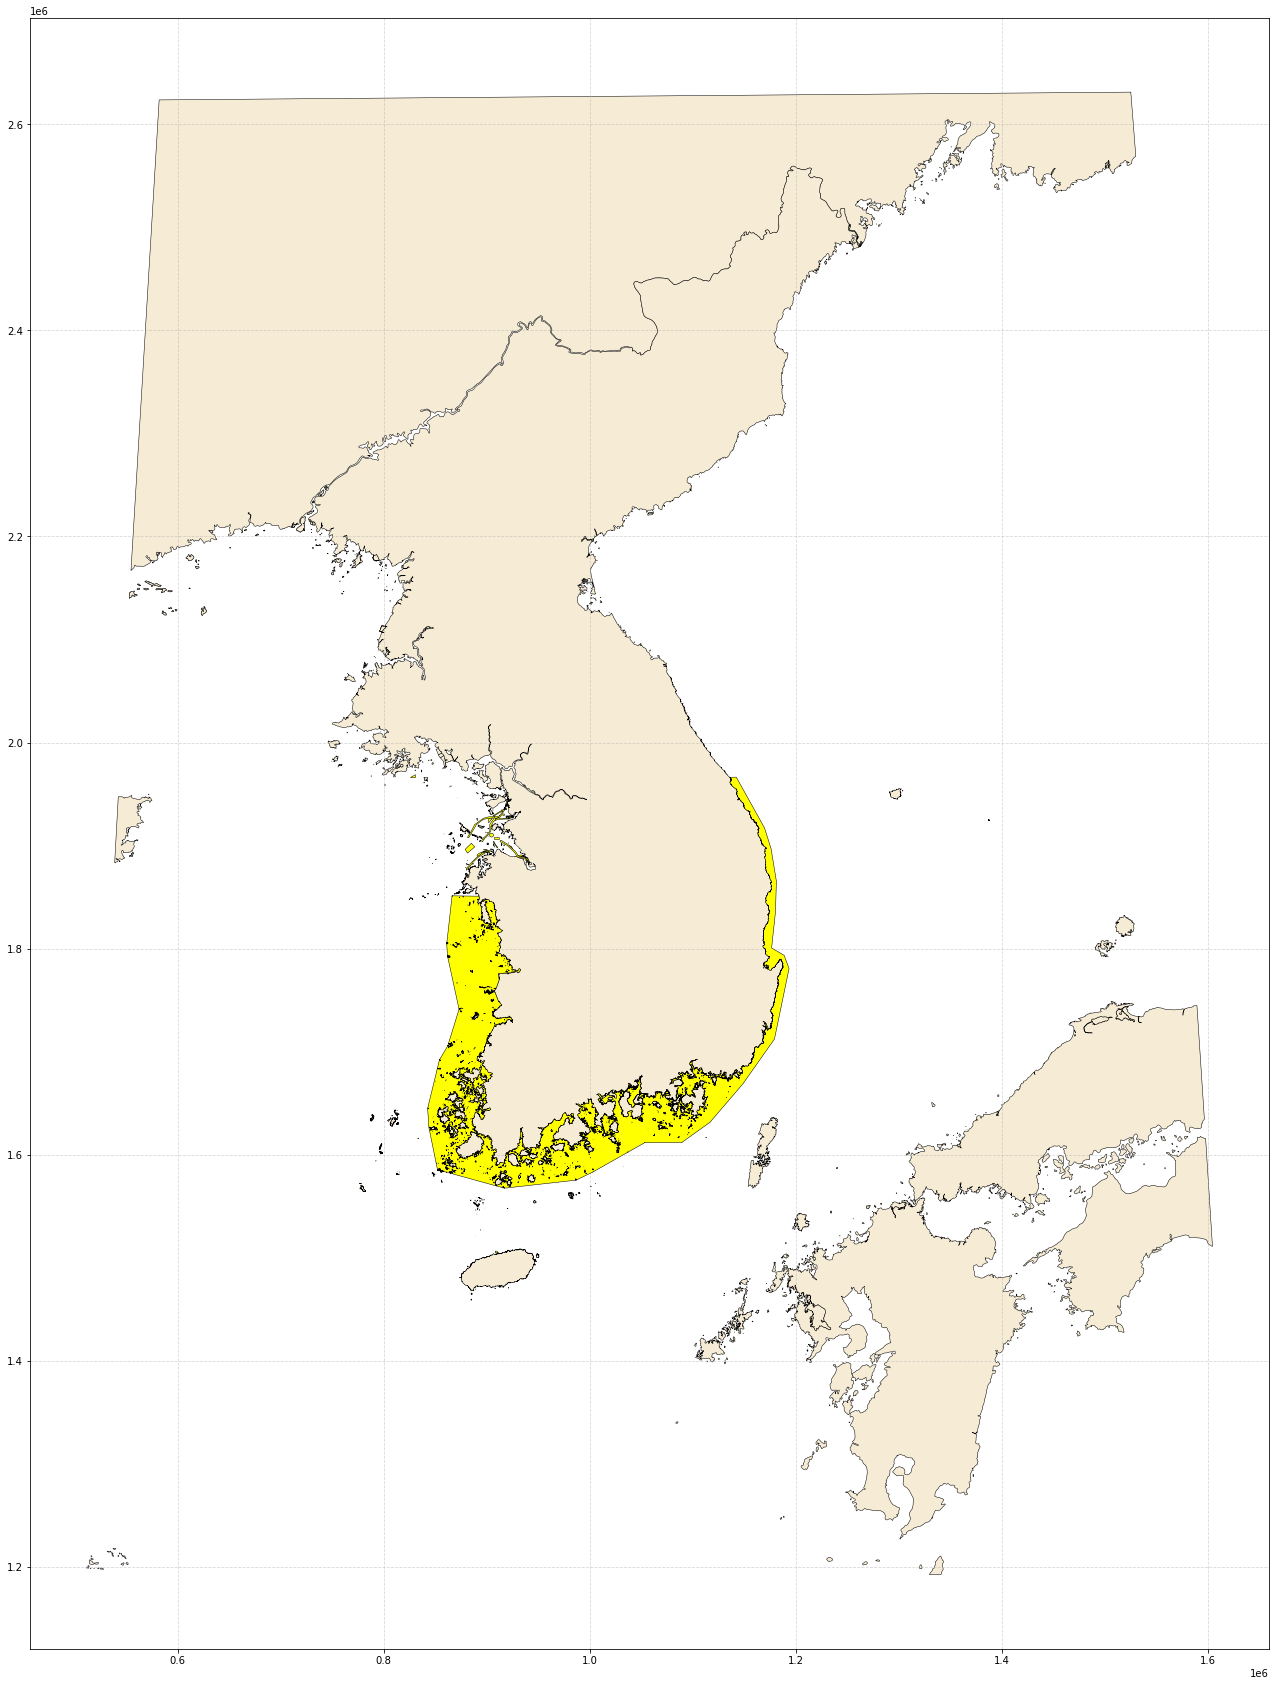

In [20]:
df = object.difference(input)
plot_map(df)

In [23]:
df.dropna(inplace=True)
df

0     MULTIPOLYGON (((857737.134 1584166.650, 857659...
1     POLYGON ((1171527.592 1722643.140, 1171515.787...
2     POLYGON ((1170531.460 1724226.187, 1170517.834...
3     POLYGON ((886716.028 1881865.070, 886551.331 1...
4     POLYGON ((938707.045 1884761.289, 938531.511 1...
5     POLYGON ((933877.575 1888937.644, 931366.270 1...
6     POLYGON ((898677.945 1893901.229, 898217.141 1...
7     POLYGON ((917012.540 1899749.139, 916821.039 1...
8     POLYGON ((902387.034 1893296.682, 900868.054 1...
9     POLYGON ((925163.442 1896889.405, 921859.087 1...
10    POLYGON ((916560.703 1928973.309, 916214.764 1...
11    POLYGON ((914624.888 1934022.779, 914344.784 1...
12    POLYGON ((919461.313 1943461.326, 919422.228 1...
13    POLYGON ((910503.484 1503842.188, 910462.726 1...
14    POLYGON ((910285.857 1897893.850, 907803.600 1...
15    POLYGON ((904677.563 1908275.525, 904359.647 1...
16    POLYGON ((930630.107 1890235.111, 930416.555 1...
17    POLYGON ((912342.261 1905909.908, 907605.8

In [22]:
input

,OBJECTID,Shape_Leng,Shape_Area,label,_count,_sum,_mean,area,geometry
0,539,290.177191,4651.114803,lnd_a,0.0,0.0,NaN,0.004648,"POLYGON ((890129.044 1542331.732, 890131.095 1..."
1,540,107.030900,453.482427,lnd_a,0.0,0.0,NaN,0.000453,"POLYGON ((890110.041 1542384.587, 890112.362 1..."
2,541,251.099622,2172.038062,lnd_a,0.0,0.0,NaN,0.002171,"POLYGON ((893121.627 1545874.175, 893121.707 1..."
3,542,150.209545,1521.482416,lnd_a,0.0,0.0,NaN,0.001520,"POLYGON ((893169.924 1546042.298, 893171.130 1..."
4,543,355.363105,6384.658359,lnd_a,0.0,0.0,NaN,0.006380,"POLYGON ((893105.356 1546162.714, 893105.576 1..."
...,...,...,...,...,...,...,...,...,...
19097,19990,215.102510,2932.528162,lnd_a,0.0,0.0,NaN,0.002930,"POLYGON ((888660.365 1520584.079, 888660.606 1..."
19098,19991,65.791039,299.247679,lnd_a,0.0,0.0,NaN,0.000299,"POLYGON ((894311.462 1526853.077, 894311.542 1..."
19099,19992,5.031071,1.933996,lnd_a,0.0,0.0,NaN,0.000002,"POLYGON ((894314.388 1526888.322, 894314.549 1..."
19100,19993,4.570763,1.511995,lnd_a,0.0,0.0,NaN,0.000002,"POLYGON ((894047.655 1526988.930, 894048.319 1..."


result